---------------------------


# Performace Assessment: D207 Exploratory Data Analysis

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D207: Exploratory Data Analysis
<br>Professor David Gagner
<br>December 29, 2023

-------------------------------------


## Task A:  Describe a real-world organizational situation or issue in the Data Dictionary you chose, by doing the following:

### **A1. Provide one question that is relevant to your chosen data set.**

Patient readmissions represent a significant concern in the medical sector, impacting patient welfare and hospital operations alike. The gravity of the issue is underscored by the fact that the Centers for Medicare and Medicaid Services (CMS) have introduced financial penalties for hospitals experiencing elevated readmission rates (WGU, 2023). Despite the potential economic and image costs, numerous hospitals find themselves ill-equipped to effectively address readmissions. This performance assessment aims to explore this critical gap by looking for factors that might influence a patient's probability of readmission, thus enhancing the data analytics process crucial for fostering better health service outcomes.

**Question**: Do the medical services a patient receives during their initial hospitalization influence their chances of readmission to hospital?

  To tackle this question, the `medical_clean.csv` dataset (WGU, 2023) has beem cleaned for analysis and will be used. This dataset is rich with a variety of variables that could influence a patient's chances of returning to the hospital. After inspecting and understanding the data in this particular context, analasys and statistical tests are performed to try and see if a potential relationship exists between recieved medical services (`Services`) and patient readmissions (`ReAdmis`). If none are upon initial examination, one will be chhose for comparison based on the analysits understanding of the data and the question being asked, and past history working with medical data in a hospital setting.

### **A2. Explain how stakeholders in the organization could benefit from an analysis of the data.**

The stakeholders likely include hospital administrators, healthcare staff, patients, and possibly investors. Administrators and staff can use this analysis to pinpoint patients at higher risk of readmission, allowing them to implement preventive strategies. This proactive approach not only curtails costs linked to readmissions but also elevates patient care quality. Patients stand to benefit from improved healthcare practices and reduced likelihood of readmissions, enhancing their overall health outcomes. In essence, this analysis could facilitate more efficient hospital operations and foster better patient care.

### **A3. Identify all of the data in your data set that are relevant to answering your question in part** *A1*.

**Variable Categories**:
  This dataset contains information on 10,000 patients who were admitted to a hospital. For a general understand of the type of information containg within it, we can break the variables down into the following general categories:
  - *Patient Characteristics*: Age, gender, and various health conditions.
  - *Hospital Stay Details*: Treatments administered, duration of hospitalization, and the nature of the patient's initial entry. Importantly, the dataset includes a 'ReAdmis' variable, which is a binary indication (Yes, No) of whether the patient was readmitted within a month of discharge.
  - *Health Issues*: Hypertension, cerebral incidents, excessive weight, joint inflammation, and sugar imbalances.
  - *Demographics*: Sex, age bracket, occupation, and educational background.

  **Variables**: 
  Although several variables are explored in this assesment, our main focus will be between `ReAdmis` and `Services`. Any additionaly variables of interest will be categorical and contain a limited set of distinct levels. For example, while zip codes are nominal categorical variables, their effectiveness is constrained by the extensive number of unique levels in a large dataset. Therefore, we will prioritize variables with a smaller and more manageable number of unique levels for a substantive Chi-square analysis. To narrow the focus, Microsoft Excel was used to reduce `medical_clean.csv` to a clean set of variables relevant to this analsys. This updated dataset is named `medical_clean_forchi.csv` and includes the following variables:  
   
  - `Gender`, `HighBlood`, `Stroke`, `Complication_risk`, `Overweight`, `Arthritis`, `Diabetes`, `Hyperlipidemia`, `BackPain`, `Anxiety`, `Allergic_rhinitis`, `Reflux_esophagitis`, `Asthma`, `Services`, `Initial_admin`, `Marital`, `VitD_supp`, `Soft_drink`, `ReAdmis`.

  The table below describes all the categorical variables in the `medical_clean_forchi.csv` dataset as received from an online source (WGU, 2023). The table includes the Variable name, Data type, Variable Type, Description, and an Example for every variable in the dataset.


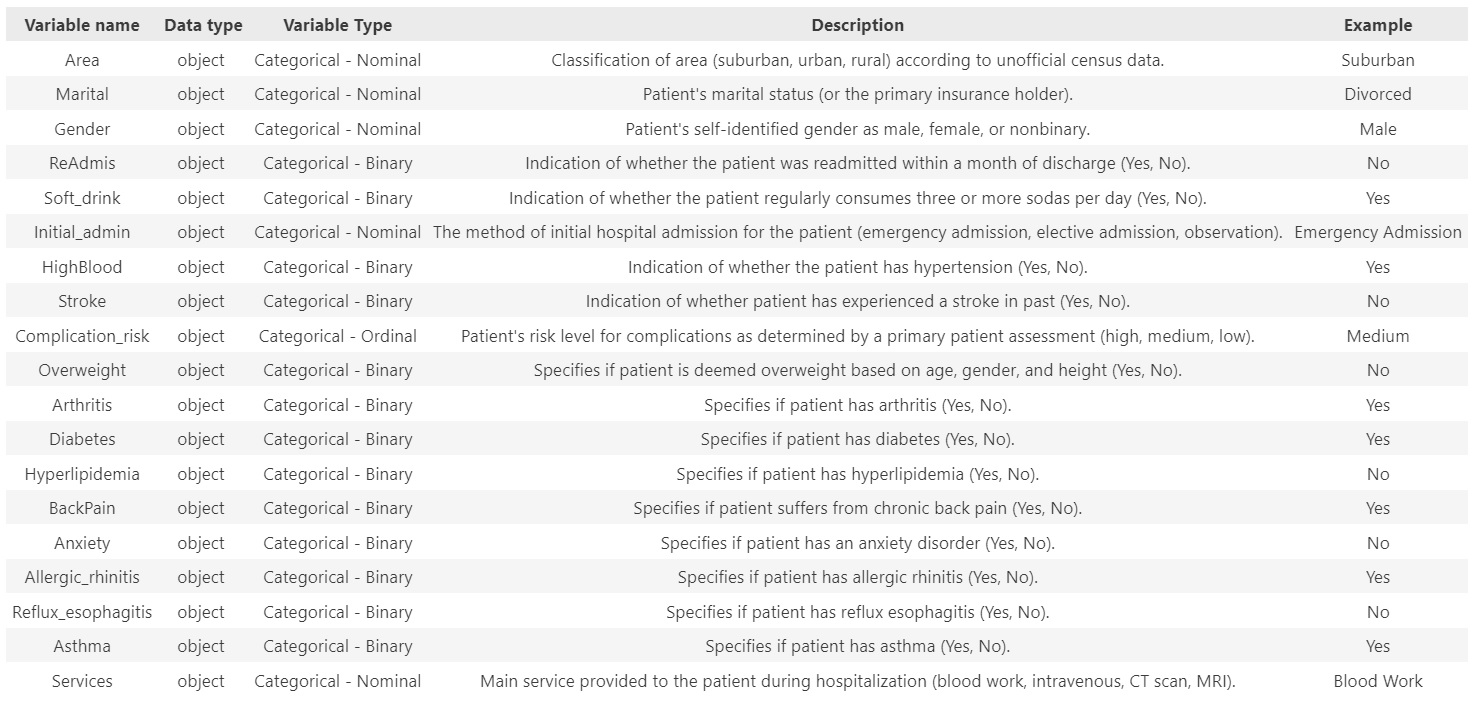

In [281]:
from IPython.display import Image
Image(filename='variable_descriptions_d207.jpg')

--------------------------------------------

## Task B:  Describe the data analysis by doing the following:

### **B1.  Using one of the following techniques, write code in  Python to run the analysis of the data set:**

-   [X] **chi-square**

-   [  ] t-test

-   [  ] ANOVA


In [314]:
# Check the code below (lines 2-13) to make sure it is correct and will do what we want it to do. If it is not correct, fix it.
%pip install scikit-learn
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
from scipy.stats import chi2_contingency

Note: you may need to restart the kernel to use updated packages.


In [315]:
# import the data and read it into a dataframe
df_cat = pd.read_csv('medical_clean_forchi.csv')

# Display the first/last five rows of the data
df_cat.head()

,Area,Marital,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,Suburban,Divorced,Male,No,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Urban,Married,Female,No,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,Suburban,Widowed,Female,No,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,Suburban,Married,Male,No,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,Rural,Widowed,Female,No,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan


In [316]:
# View the last 5 rows of the dataframe and make sure the data has made it all the way to the last expected row
df_cat.tail()

,Area,Marital,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
9995,Urban,Widowed,Male,No,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous
9996,Urban,Widowed,Male,Yes,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan
9997,Rural,Separated,Female,Yes,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous
9998,Rural,Divorced,Male,Yes,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work
9999,Urban,Separated,Female,Yes,No,Observation Admission,No,No,Low,Yes,Yes,No,Yes,No,No,Yes,No,No,Blood Work


In [317]:
# Understanding the Data
# Check the shape of the DataFrame. df.shape returns a tuple: ([0],[1]) = (rows, columns)
print('Total rows:', df_cat.shape[0])
print('Total columns:', df_cat.shape[1])

Total rows: 10000
Total columns: 19


In [318]:
# Check the DataFrame information
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Area                10000 non-null  object
 1   Marital             10000 non-null  object
 2   Gender              10000 non-null  object
 3   ReAdmis             10000 non-null  object
 4   Soft_drink          10000 non-null  object
 5   Initial_admin       10000 non-null  object
 6   HighBlood           10000 non-null  object
 7   Stroke              10000 non-null  object
 8   Complication_risk   10000 non-null  object
 9   Overweight          10000 non-null  object
 10  Arthritis           10000 non-null  object
 11  Diabetes            10000 non-null  object
 12  Hyperlipidemia      10000 non-null  object
 13  BackPain            10000 non-null  object
 14  Anxiety             10000 non-null  object
 15  Allergic_rhinitis   10000 non-null  object
 16  Reflux_esophagitis  100

In [319]:
# Check the Descriptive Statistics of the DataFrame
print("Columns 1-9 of 19:")
df_cat.iloc[:, :9].describe()

Columns 1-9 of 19:


,Area,Marital,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,5,3,2,2,3,2,2,3
top,Rural,Widowed,Female,No,No,Emergency Admission,No,No,Medium
freq,3369,2045,5018,6331,7425,5060,5910,8007,4517


In [320]:
# Check the Descriptive Statistics of the DataFrame
print("Columns 10-18 of 19:")
df_cat.iloc[:, 9:19].describe()


Columns 10-18 of 19:


,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,2,2,2,2,2,2,2,4
top,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


- There are No missing values, duplicate rows, or duplicate columns in the dataset. The number of unique values aligns with the expected data types and values for each column. The data is clean and ready for analysis.

- Now the data structure is understood, a contingency table is created to show the frequencies of the "Services" across the "ReAdmis" categories. Additionally, the expected and observed frequencies will be compared. Then,  the chi-square test will be performed to see if there's a statistically significant association between these two variables.

### **B2.  Provide the output and the results of any calculations from the analysis you performed.**

**Null hypothesis H<sub>0:** There is not a relationship between `Services` and `ReAdmis` <br>
    <br>
**Alternative hypothesis H<sub>1:** There is a relationship between `Services` and `ReAdmis` <br>

We'll establish our `alpha`, or the threshold for statistical significance, at `0.05`. This level is widely accepted as the conventional standard in research.

A Chi-square test of independence is conducted since both Services and ReAdmis are categorical variables.

In [332]:
# Create a contingency table of the two variables 'ReAdmis' and 'Services'
print("Contingency table for `ReAdmis` and `Services` with row and column totals")
contingency_table = pd.crosstab(df_cat['ReAdmis'], df_cat['Services'])
contingency_table

Contingency table for `ReAdmis` and `Services` with row and column totals


Services,Blood Work,CT Scan,Intravenous,MRI
ReAdmis,,,,
No,3335,737,2027,232
Yes,1930,488,1103,148


In [339]:
from scipy.stats import chi2_contingency

# Calculate the chi-square value, p-value, degrees of freedom, and expected frequencies
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Create a DataFrame for the expected frequencies
expected_df = pd.DataFrame(expected, index=contingency_table.index)

# Print the observed and expected frequencies
expected_df.columns = contingency_table.columns 
combined_dfinal = pd.concat([contingency_table, expected_df], axis=1)
combined_dfinal.columns = pd.MultiIndex.from_product([['Observed Frequencies', 'Expected Frequencies'], contingency_table.columns])

print("The Table below helps to assess whether there's a notable difference between the number of actual outcomes (observed frequencies) and the number of times one would expect that outcome to occur purely by chance (expected frequencies), assuming there is no underlying association between the variables in question. There are slight differences between some of the observed and expected frequencies.")

combined_dfinal

The Table below helps to assess whether there's a notable difference between the number of actual outcomes (observed frequencies) and the number of times one would expect that outcome to occur purely by chance (expected frequencies), assuming there is no underlying association between the variables in question. There are slight differences between some of the observed and expected frequencies.


Observed Frequencies                          Expected Frequencies  \
Services           Blood Work CT Scan Intravenous  MRI           Blood Work   
ReAdmis                                                                       
No                       3335     737        2027  232            3333.2715   
Yes                      1930     488        1103  148            1931.7285   

                                         
Services   CT Scan Intravenous      MRI  
ReAdmis                                  
No        775.5475    1981.603  240.578  
Yes       449.4525    1148.397  139.422

In [340]:
# Print the Chi-Squared test statistic, degrees of freedom, and p-value
print('Chi-squared value:  ' + str(chi2), end='\n\n')
print('Degrees of freedom:  ' + str(dof), end='\n\n')
print('P-value:  ' + str(p_value), end='\n\n')

Chi-squared value:  8.892645054628435

Degrees of freedom:  3

P-value:  0.03075281113212747



### **B3.  Justify why you chose this analysis technique.**

Using the Chi-square test for this analysis serves both hypothesis testing and data exploration purposes. The Chi-square test is a nonparametric, distribution-free method, ideal for examining relationships between categorical variables, such as the `Services` provided to patients and their subsequent readmission (`ReAdmis`) status. This test identifies whether a statistically significant relationship exists without making assumptions about population parameters, which makes it well-suited for analyzing the categorical data in our medical dataset. Additionally, the Chi-square test is advantageous over a Z-test as it is applicable to both small and large sample sizes.

It also doesn’t require data to follow a normal distribution, a requiremetns for other tests like the t-test or ANOVA that focus more on comparing mean values. Interest here lies in determining if specific services may result in hospital readmissions, not in comparing averages. The Chi-square test, which evaluates observed frequencies against expected frequencies under an assumption that there is no association, aligns with the research needs. Because it operates on frequency of values, it avoids the need for data to fit a normal distribution. This is particularly beneficial for categorical data in medical research, which can include patient survey data and other categorical information. Using the Chi-square test gives one a direct and effective method for discovering potential dependencies in data, especially regarding patient readmission.

----------------------------------------------------------------------

### **C1:  Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data.**

### Represent your ﬁndings in Part C, visually as part of your submission.

For the `univariate` statistics, we will look at the distribution of the following variables contained in the `medical_clean.csv` dataset:

- `VitD_levels`: float64, continuous. A measurement of the patient's vitamin D levels in ng/mL. e.g. 17.80233049
- `Initial_days`: float64, continuous. Duration of the patient's initial hospital stay in days. e.g. 10.58576971
<br>

- `Services`: object, nominal. Main service provided to the patient during hospitalization (blood work, intravenous, CT scan, MRI)
- `Overweight`: object, binary. A measurement of the patient's vitamin D levels in ng/mL. (Yes, No)

The data will be read in and quickly checked using pd.read_csv() and df.head() to ensure the data is being read in correctly. Then, the data will be plotted using the Seaborn library to create a histogram for the continuous variables and a bar chart for the categorical variables. 

The plots are labeled and described, and a density plot has also been added to the histograms of the continuous variables for added visual information. 

The code and output for this analysis is shown below.
- C1. Univariate Graphics (4 total): Categoricals (2 total), Continuous (2 total)

In [293]:
df_med = pd.read_csv('medical_clean.csv')
df_med.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


`VitD_levels`: float64, continuous. A measurement of the patient's vitamin D levels in ng/mL. e.g. 17.80233049
Normal distribution


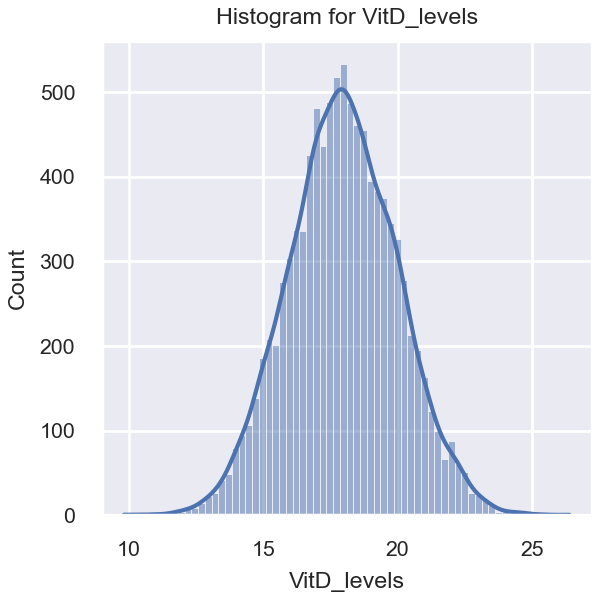



`Initial_days`: float64, continuous. Duration of the patient's initial hospital stay in days. e.g. 10.58576971
Bimodal distribution


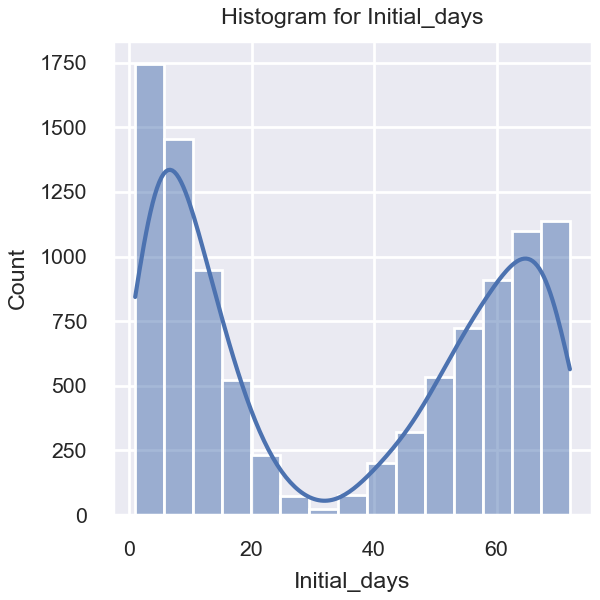



`Services`: object, nominal. Main service provided to the patient during hospitalization (blood work, intravenous, CT scan, MRI)
'Blood Work' is the most common service, making up over half of all services provided (This is an important data point for our Chi-Square analsys and is addressed in the discussion section). 'Intravenous' services are the next most common, followed by 'CT Scan' and 'MRI', which are the least common.


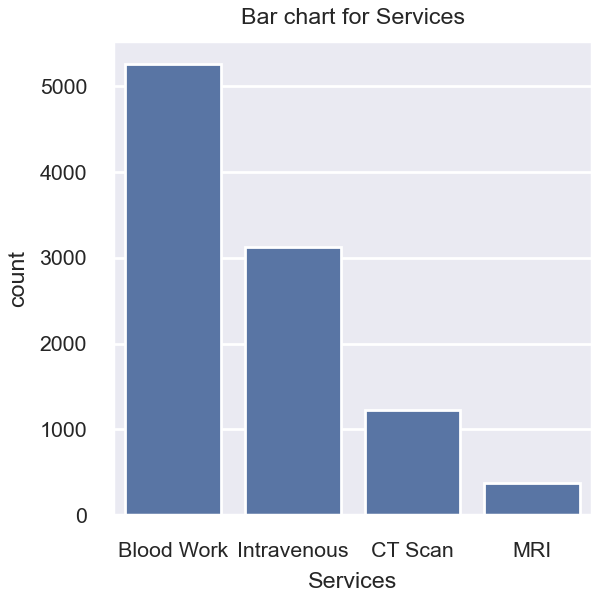



`Overweight`: object, binary. A measurement of the patient's vitamin D levels in ng/mL. (Yes, No). Most patients were considered overwieght.
Binary Categorical


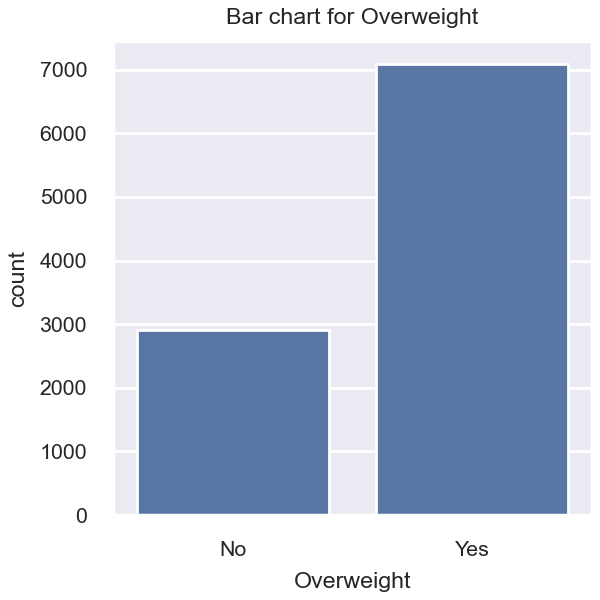

In [351]:
# Set the font size for all plots
sns.set(font_scale=0.7)

# Histogram for 'VitD_levels'
print("`VitD_levels`: float64, continuous. A measurement of the patient's vitamin D levels in ng/mL. e.g. 17.80233049")
print('Normal distribution')
plt.figure(layout='constrained', figsize=(3, 3))
sns.histplot(data=df_med, x='VitD_levels', kde=True)
plt.title('Histogram for VitD_levels')
plt.show()
print('\n')

# Histogram for 'Initial_days'
print("`Initial_days`: float64, continuous. Duration of the patient's initial hospital stay in days. e.g. 10.58576971")
print('Bimodal distribution')
plt.figure(layout='constrained', figsize=(3, 3))
sns.histplot(data=df_med, x='Initial_days', kde=True)
plt.title('Histogram for Initial_days')
plt.show()
print('\n')

# Bar chart for 'Services'
print("`Services`: object, nominal. Main service provided to the patient during hospitalization (blood work, intravenous, CT scan, MRI)")
print("'Blood Work' is the most common service, making up over half of all services provided (This is an important data point for our Chi-Square analsys and is addressed in the discussion section). 'Intravenous' services are the next most common, followed by 'CT Scan' and 'MRI', which are the least common.")
plt.figure(layout='constrained', figsize=(3, 3))
sns.countplot(data=df_med, x='Services')
plt.title('Bar chart for Services')
plt.show()
print('\n')

# Bar chart for 'Overweight'
print("`Overweight`: object, binary. A measurement of the patient's vitamin D levels in ng/mL. (Yes, No). Most patients were considered overwieght.")
print('Binary Categorical')
plt.figure(layout='constrained', figsize=(3, 3))
sns.countplot(data=df_med, x='Overweight')
plt.title('Bar chart for Overweight')
plt.show()
print('\n')

## D:  Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data. 

### Represent your ﬁndings in Part D, visually as part of your submission.

For the `bivariate` statistics, we will look at the distribution of the following variables contained in the `medical_clean.csv` dataset:

- `Initial_days`: float64, continuous. Yearly income of the patient (or the primary insurance holder). e.g. 86575.93
- `Additional_Charges`: float64, continuous. Average charge to the patient for additional procedures, treatments, medications, anesthesiology, etc. e.g. 17939.40

- `TotalCharge`: object, continuous. Daily charge to the patient. excluding specialized treament. e.g. 3191.05

- `Income`: float64, continuous. Yearly income of the patient (or the primary insurance holder). e.g. 86575.93

- `ReAdmis`: object, binary. Indication of whether the patient was readmitted within a month of discharge (Yes, No).
- `Gender`: object, nominal. Patient's self-identified gender as male, female, or nonbinary.

The plots are labeled and described.

The code and output for this analysis is shown below.
- D1. Bivariate Graphics (3 total): Continuous v Continuous (1 total), Categorical v Continuous (1 total), Categorical v Categorical (1 total)

Continuous vs. Continuous
There is a positive correlation between 'Initial_days' and 'TotalCharge', which makes sense; They are described as 'Daily Charges' so the longer a patient stays in the hospital, the more they will be charged.


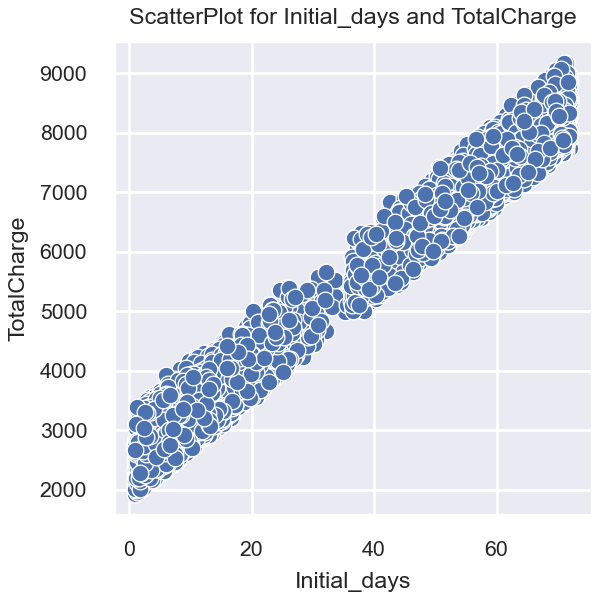



Categorical vs. Continuous
Patients with readmitted are charged more than those without a positive 'ReAdmis' status. This makes sense because they are readmitted to the hospital, which means they have already incured charges. Interestingly, we can see this in the data; as the lowest `ReAdmis`=Yes value is just under 6000.00.


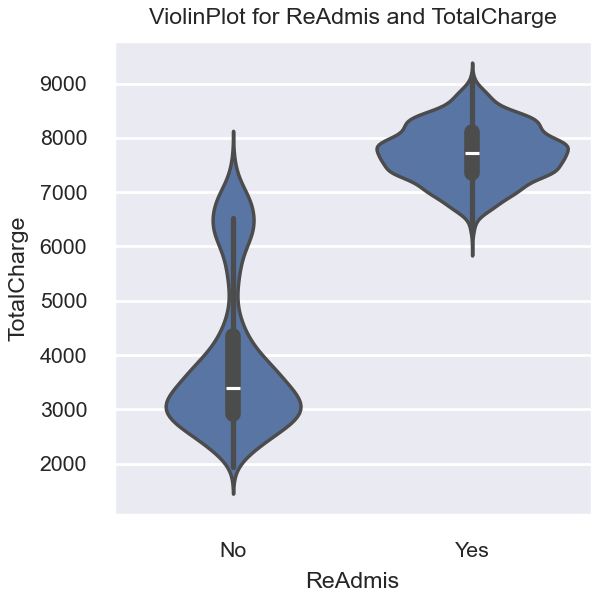



Categorical vs. Categorical
A countplot to visualize the count of observations for each combination of `ReAdmis` and `Gender`. There does not appear to be any signifigant relationships here as the visualized ratios are similar.


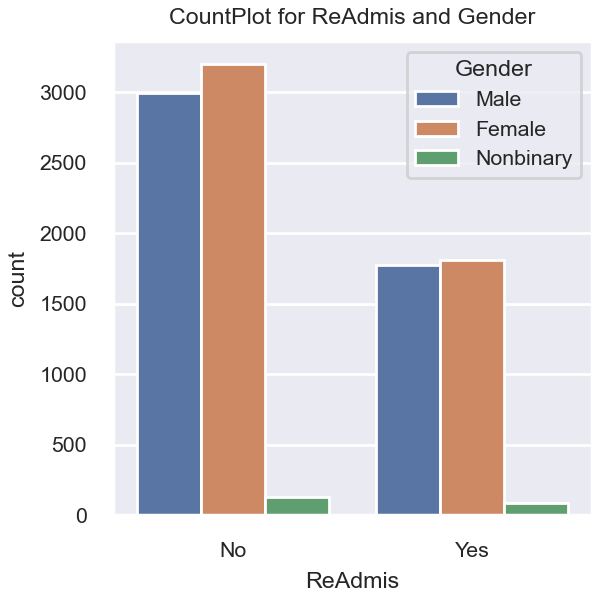

In [353]:
# Scatterplot for 'Initial_days' and 'TotalCharge'
print("Continuous vs. Continuous")
print("There is a positive correlation between 'Initial_days' and 'TotalCharge', which makes sense; They are described as 'Daily Charges' so the longer a patient stays in the hospital, the more they will be charged.")
plt.figure(layout='constrained', figsize=(3, 3))
sns.scatterplot(data=df_med, x="Initial_days", y="TotalCharge")
plt.title('ScatterPlot for Initial_days and TotalCharge')
# Show the plot
plt.show()
print('\n')

# Violin plot for Readmis and 'TotalCharge'
print("Categorical vs. Continuous")
print("Patients with readmitted are charged more than those without a positive 'ReAdmis' status. This makes sense because they are readmitted to the hospital, which means they have already incured charges. Interestingly, we can see this in the data; as the lowest `ReAdmis`=Yes value is just under 6000.00.")
plt.figure(layout='constrained', figsize=(3, 3))
sns.violinplot(data=df_med, x="ReAdmis", y="TotalCharge")
plt.title('ViolinPlot for ReAdmis and TotalCharge')
# Show the plot
plt.show()
print('\n')

# Count plot for Readmis and 'Gender'
print("Categorical vs. Categorical")
print("A countplot to visualize the count of observations for each combination of `ReAdmis` and `Gender`. There does not appear to be any signifigant relationships here as the visualized ratios are similar.")
plt.figure(layout='constrained', figsize=(3, 3))
sns.countplot(data=df_med, x="ReAdmis", hue="Gender")
plt.title('CountPlot for ReAdmis and Gender')
# Show the plot
plt.show()
print('\n')

## E:  Summarize the implications of your data analysis by doing the following:

### **E1.  Discuss the results of the hypothesis test.**

In the context of the chi-square analysis we performed, the hypotheses can be framed as follows:

-   **Null hypothesis H<sub>0</sub>:** There is not a significant assosiation between `Services` and `ReAdmis` <br>
    <br>
-   **Alternative hypothesis H<sub>1</sub>:** There is a significant association between `Services` and `ReAdmis` <br>

**Null hypothesis H<sub>0</sub>:** This implies that the likelihood of a patient being readmitted does not depend on the type of service they received during their initial visit to the hospital. In other words, whether a patient received Blood Work, a CT Scan, Intravenous therapy, or an MRI does not appear to play a role in their chances of being readmitted.

**Alternative hypothesis H<sub>1</sub>:** There is a relationship between Services and ReAdmis. <br>
This suggests that the type of services a patient receives has some influence on their likelihood of being readmitted to the hospital. The association could mean that certain services are more frequently associated with readmission than others.

Analysis of Hypothesis Test Based on the chi-square test:

The chi-square statistic was 8.893.
The p-value was 0.0308.
Since the p-value (0.0308) is less than the standard alpha level of 0.05, we reject the null hypothesis H<sub>0</sub>. This leads us to conclude that there is a statistically significant association between the type of service received (`Services`) and the likelihood of readmission (`ReAdmis`).

Interpretation:

Rejecting the null hypothesis supports the alternative hypothesis H<sub>1</sub>. This suggests readmission to the hospital may be influenced by the type of services they recieved on thier first visit to the hospital. In the observed data, certain services are associated with different rates of readmission, which could be higher or lower than what would be expected if there was no association at all.


### **E2.  Discuss the limitations of your data analysis.**

It is important to remember that this association does not imply causation. Additionally, the analysis does not tell us which specific services are associated with readmission, or why. The observed association might be influenced by other factors not accounted for in this analysis, such as patient health status, severity of the medical issue, or other demographic and clinical variables. Additionally, the distribution of services provided to patients in the dataset is not uniform, with some services being more common than others, and more expensive than others. This could influence the observed association between services and readmission rates. For example, blood work could likely be one of the most common diagnostic services provided to patients and can be less expensive when compared to medical imaging. It is also less time consuming. In contrast, MRI is one of the least common services provided to patients, and it is also one of the most expensive and time consuming in our categories. Time consuming modalities by nature are not as available as less time consuming tests. This could influence the observed association between services and readmission rates.

### **E3.  Recommend a course of action based on your results.**

In regard to the original question, although this analysis suggests that the type of medical services a patient receives during their initial hospitalization may indeed influence their likelihood of readmission, the issue is not yet definitively answered. More investigation is required to establish this conclusion with confidence.

From an analysis standpoint, it is important to conduct further investigation to confirm the association between services and readmission rates. Additionally, it would be crucial to fully understand the nature of this relationship, particularly as it relates to the commonality of the services provided to patients. This could help us determine whether the association is driven by the frequency or the type of services.

For stakeholders, if the services are indeed associated with readmission, then it would be important to understand which specific services contribute and why. Investigating which services are more associated with readmission could help identify specific areas for improvement in patient care or follow-up procedures. Moreover, the association might not be with the services themselves but rather with the quality of care in different departments, which might influence readmission rates. Ensuring consistent high-quality care across all services could be a key factor in reducing readmissions. This would help the hospital implement targeted interventions to improve patient outcomes and reduce unnecessary costs.

--------------------

### G & H: References

- Western Governors University IT Department. (2023). R or Python? How to decide which programming language to learn. Retrieved from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html#_

- Western Governors University. (2023, September 11). D206 - EMA dataset. Retrieved from https://web5.wgu.edu/aap/content/d206-ema.html

- Getting Started with D206 | PCA." (2023, September 12). WGU Panopto. Retrieved from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3bcc452f-fa35-43be-b69f-b05901356f95

- Bigabid. (2023, September 12). What is 'PCA' and how can I use it? Retrieved September 11, 2023, from https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/

